In [17]:
! pip install plotnine
! pip install ipympl
! pip install plotly
! pip install natsort

In [18]:
%matplotlib widget

In [32]:
import pandas as pd
from plotnine import *
import plotly.express as px
from natsort import index_natsorted
import numpy as np
from util.datasource import anything, corroles
from util.analysis import ext_modes, plot_selector, perc_comp, perc_ext

In [20]:
df = corroles.dataFrame
df["dominant"] = df[plot_selector].idxmax(axis=1)

### Select only direct porphystruct output

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 

In [22]:
preprocess = ColumnTransformer(
    transformers = [
        ("prepocess_ext", Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
                ("scaler", StandardScaler())
            ]
        ), perc_ext + ["Doop (exp.)"])
    ], sparse_threshold=0)

In [79]:
tsne = TSNE(n_components=2, random_state=91, perplexity=50)
mapping = tsne.fit_transform(preprocess.fit_transform(df))

In [131]:
df_mapping = pd.DataFrame(mapping, columns=["x", "y"])
df_mapping["category"] = df["category"]
df_mapping["M"] = df["M"]
df_mapping["Doop"] = df["Doop (exp.)"]
df_mapping["Coord_No"] = df["Coord_No"].astype(str)
df_mapping["No_Subs"] = df["No_Subs"].astype(str)
df_mapping["Group"] =  df["Group"].astype(str)
df_mapping["dominant"] = df["dominant"]
df_mapping["Ligand"] = df["Ligand"]
df_mapping["Axial"] = df["Axial"]
df_mapping["CCDC"] = df["CCDC"]

### By Dominant Mode

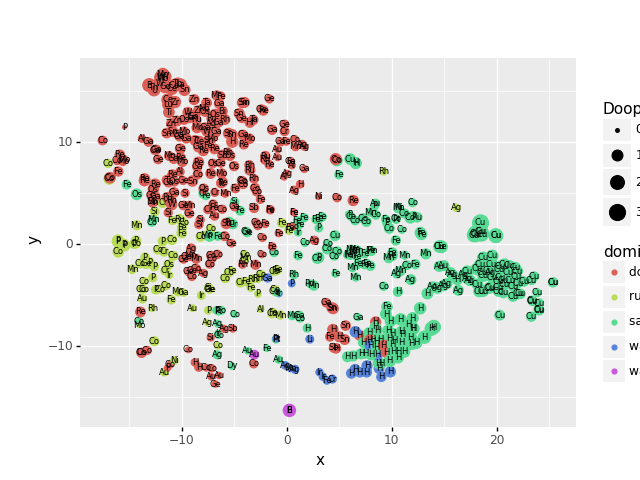

<ggplot: (144997719796)>

In [81]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="dominant", size="Doop")) + geom_text(size=6)

In [87]:
fig = px.scatter(df_mapping, x="x", y="y", color="dominant", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}")
fig.update_traces(textfont_size=8)


### By Group

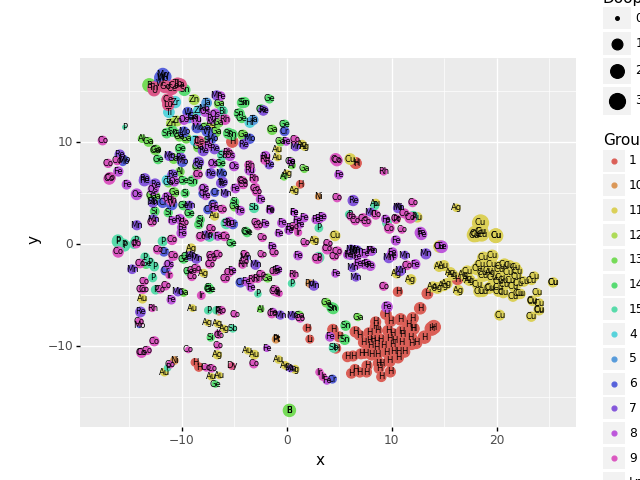

<ggplot: (144999843033)>

In [140]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="Group", size="Doop")) + geom_text(size=6)

In [145]:
df_mapping.sort_values(by="Group", key=lambda x: np.argsort(index_natsorted(df_mapping["Group"])), inplace=True)
fig = px.scatter(df_mapping, x="x", y="y", color="Group", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}")
fig.update_traces(textfont_size=8)


### By Category

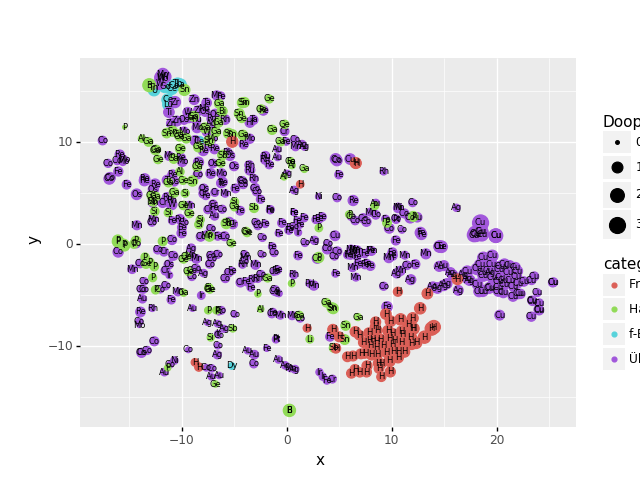

<ggplot: (144983951632)>

In [27]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="category", size="Doop")) + geom_text(size=6)

In [132]:
fig = px.scatter(df_mapping, x="x", y="y", color="category", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}")
fig.update_traces(textfont_size=8)


### By Coordination Number

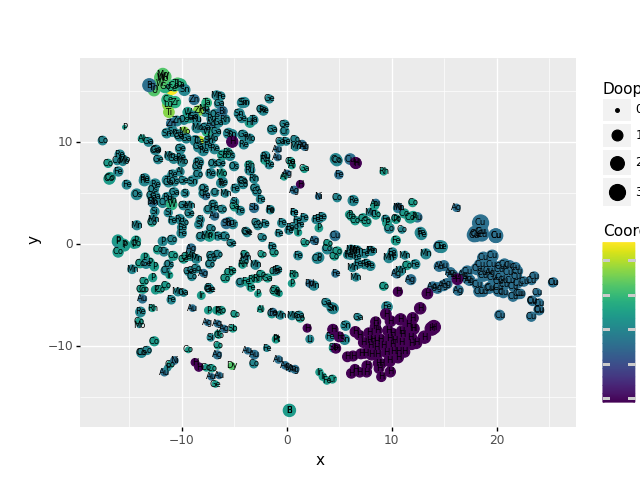

<ggplot: (144996632152)>

In [91]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="Coord_No", size="Doop")) + geom_text(size=6)

In [94]:
fig = px.scatter(df_mapping, x="x", y="y", color="Coord_No", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}")
fig.update_traces(textfont_size=8)


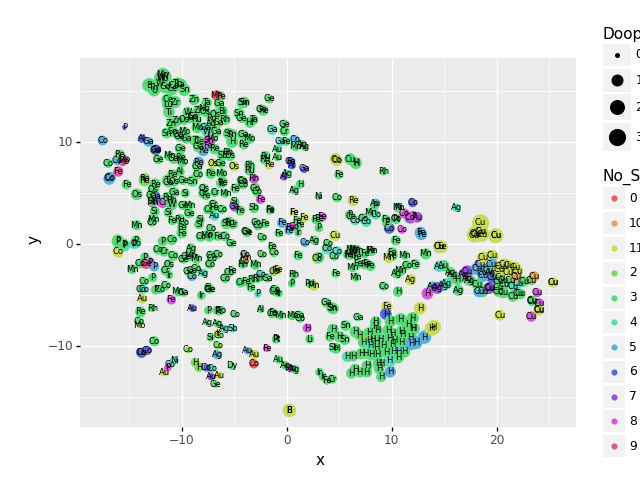

<ggplot: (144997058286)>

In [95]:
ggplot(df_mapping, aes(x="x", y="y", label="M")) + geom_point(aes(colour="No_Subs", size="Doop")) + geom_text(size=6)

In [101]:
df_mapping.sort_values("No_Subs", inplace=True)
fig = px.scatter(df_mapping, x="x", y="y", color="No_Subs", size="Doop", text="M", custom_data=["M", "Ligand", "Axial", "Coord_No", "No_Subs",  "Doop", "CCDC", "dominant"], width=900, height=600)
fig.update_traces(hovertemplate="CCDC: %{customdata[6]}<br>%{customdata[0]} %{customdata[1]} %{customdata[2]} <br>Coordination Number: %{customdata[3]} <br>%{customdata[7]}")
fig.update_traces(textfont_size=8)